In [1]:
%matplotlib inline

from collections import defaultdict
import numpy
import matplotlib
import seaborn
from matplotlib import pyplot as plt

matplotlib.rcParams['axes.labelsize'] = 16
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['savefig.dpi'] = 150
seaborn.set_context({"figure.figsize": (16, 12)})

In [2]:
def load_hists(filename):
    with open(filename, 'r') as infile:
        abund_hist = eval(next(infile))
        unique_hist = eval(next(infile))
    return abund_hist, unique_hist

In [3]:
kvalues = list(range(25, 42, 2))
muttype = ['snv', 'del']
abund_hists = defaultdict(dict)
unique_hists = defaultdict(dict)

for k in kvalues:
    for mt in muttype:
        infilename = 'HsapMutSim/k{}.{}.hist'.format(k, mt)
        ahist, uhist = load_hists(infilename)
        abund_hists[k][mt] = ahist
        unique_hists[k][mt] = uhist

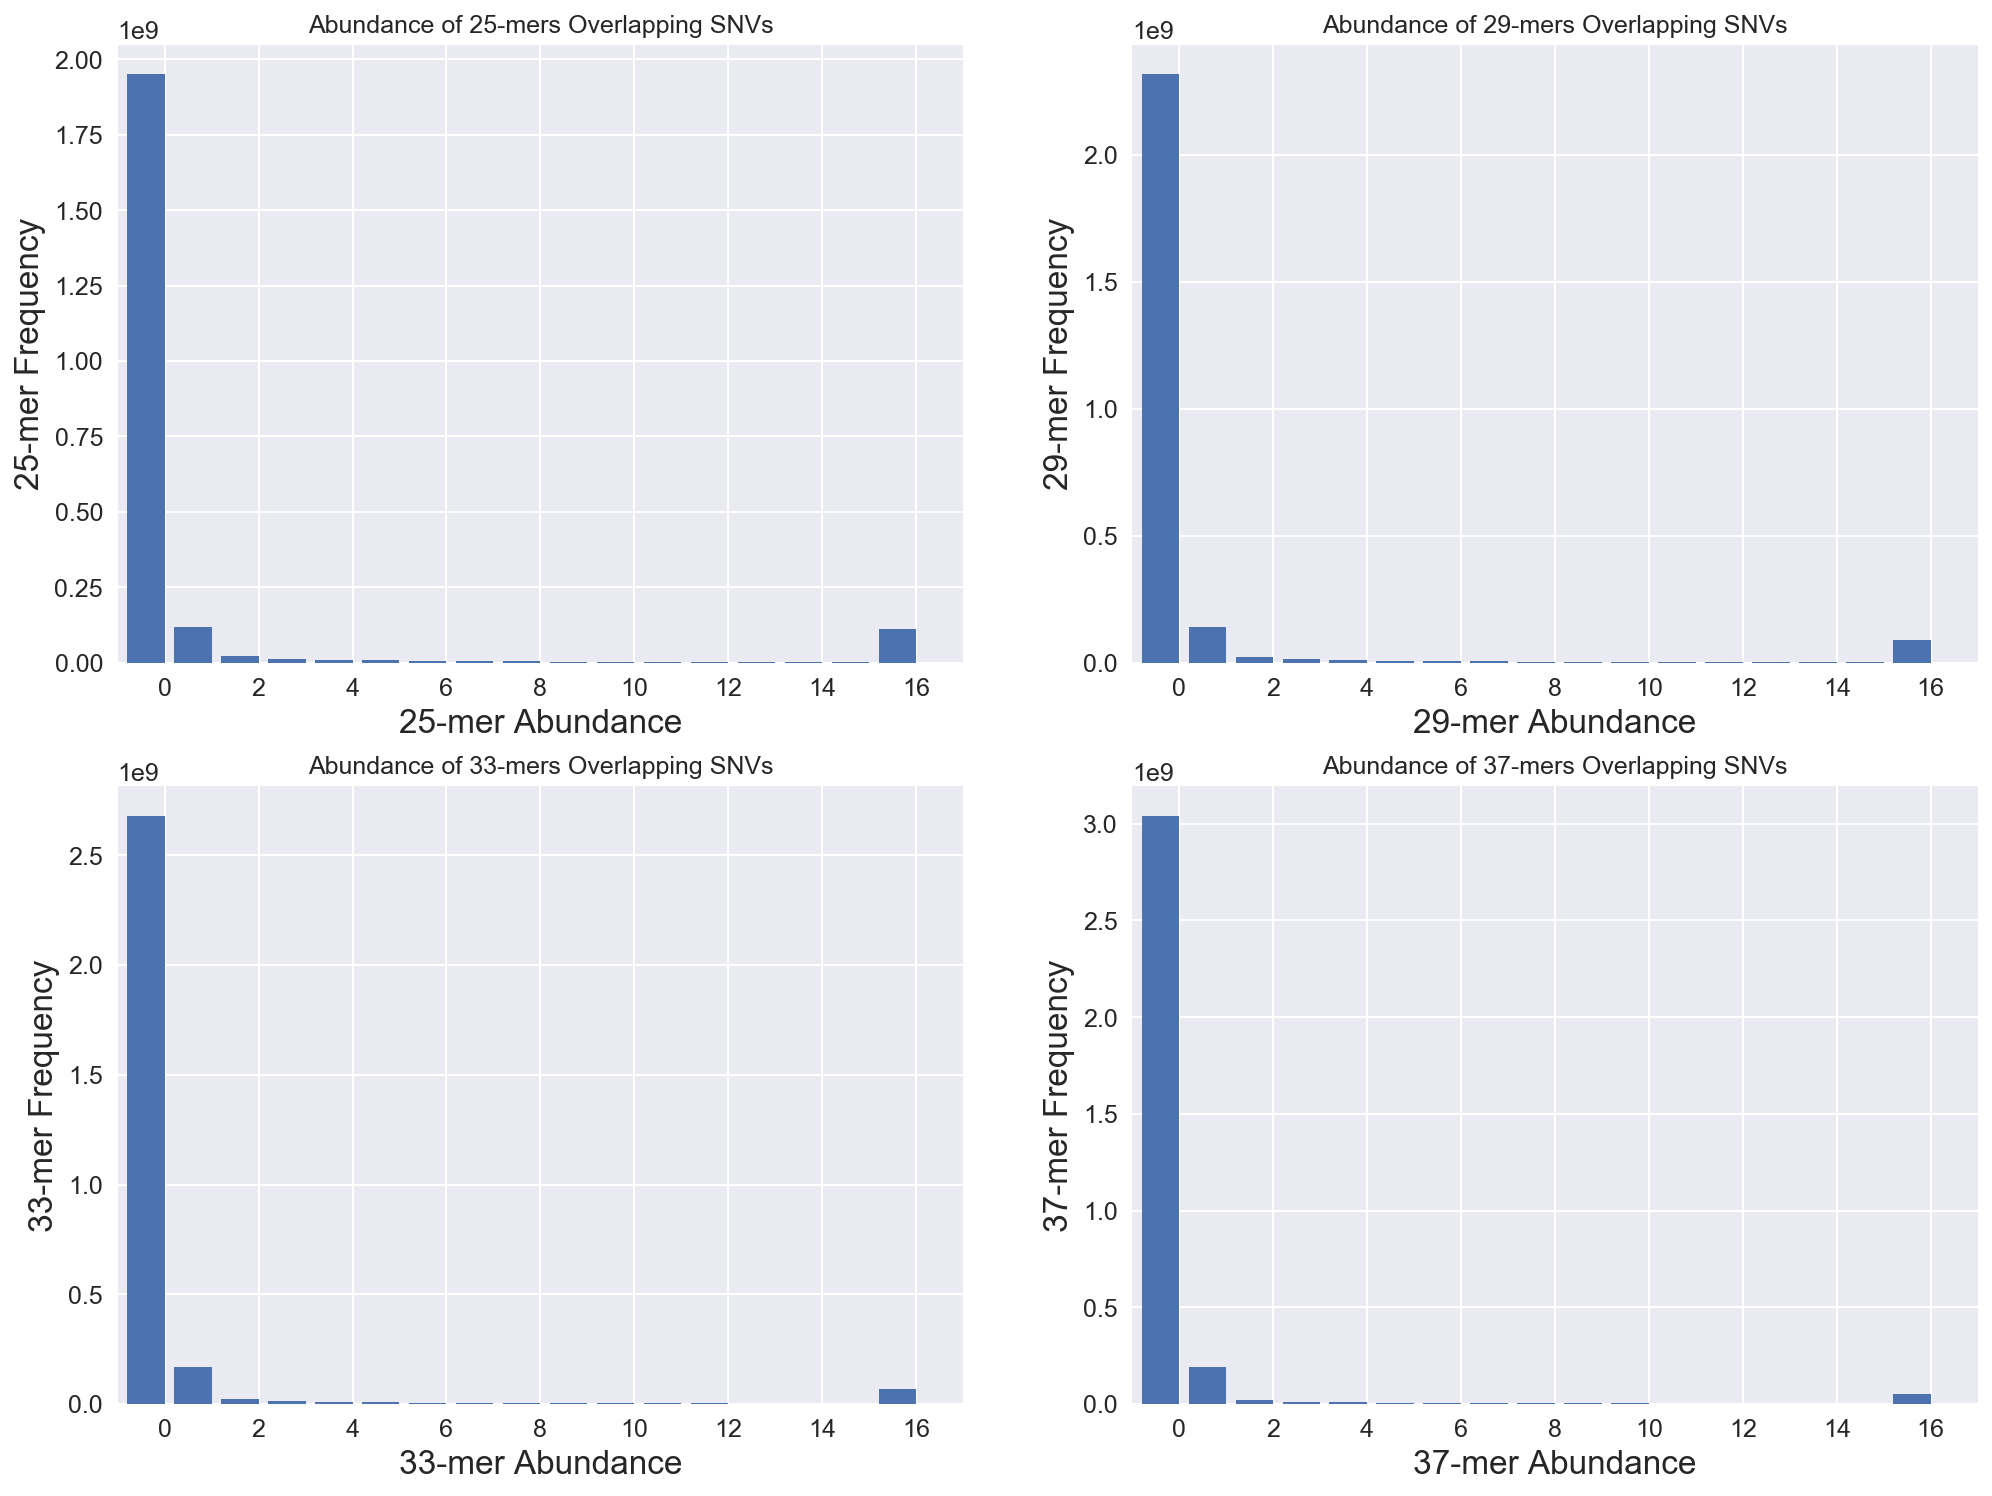

In [4]:
figure, axes = plt.subplots(2, 2, sharey=False)
axes = axes.ravel()
x = [n - 0.4 for n in range(16 + 1)]

_ = axes[0].bar(x, abund_hists[25]['snv'])
_ = axes[0].set_xlim(-1, 17)
_ = axes[0].set_xlabel('25-mer Abundance')
_ = axes[0].set_ylabel('25-mer Frequency')
_ = axes[0].set_title('Abundance of 25-mers Overlapping SNVs')

_ = axes[1].bar(x, abund_hists[29]['snv'])
_ = axes[1].set_xlim(-1, 17)
_ = axes[1].set_xlabel('29-mer Abundance')
_ = axes[1].set_ylabel('29-mer Frequency')
_ = axes[1].set_title('Abundance of 29-mers Overlapping SNVs')

_ = axes[2].bar(x, abund_hists[33]['snv'])
_ = axes[2].set_xlim(-1, 17)
_ = axes[2].set_xlabel('33-mer Abundance')
_ = axes[2].set_ylabel('33-mer Frequency')
_ = axes[2].set_title('Abundance of 33-mers Overlapping SNVs')

_ = axes[3].bar(x, abund_hists[37]['snv'])
_ = axes[3].set_xlim(-1, 17)
_ = axes[3].set_xlabel('37-mer Abundance')
_ = axes[3].set_ylabel('37-mer Frequency')
_ = axes[3].set_title('Abundance of 37-mers Overlapping SNVs')

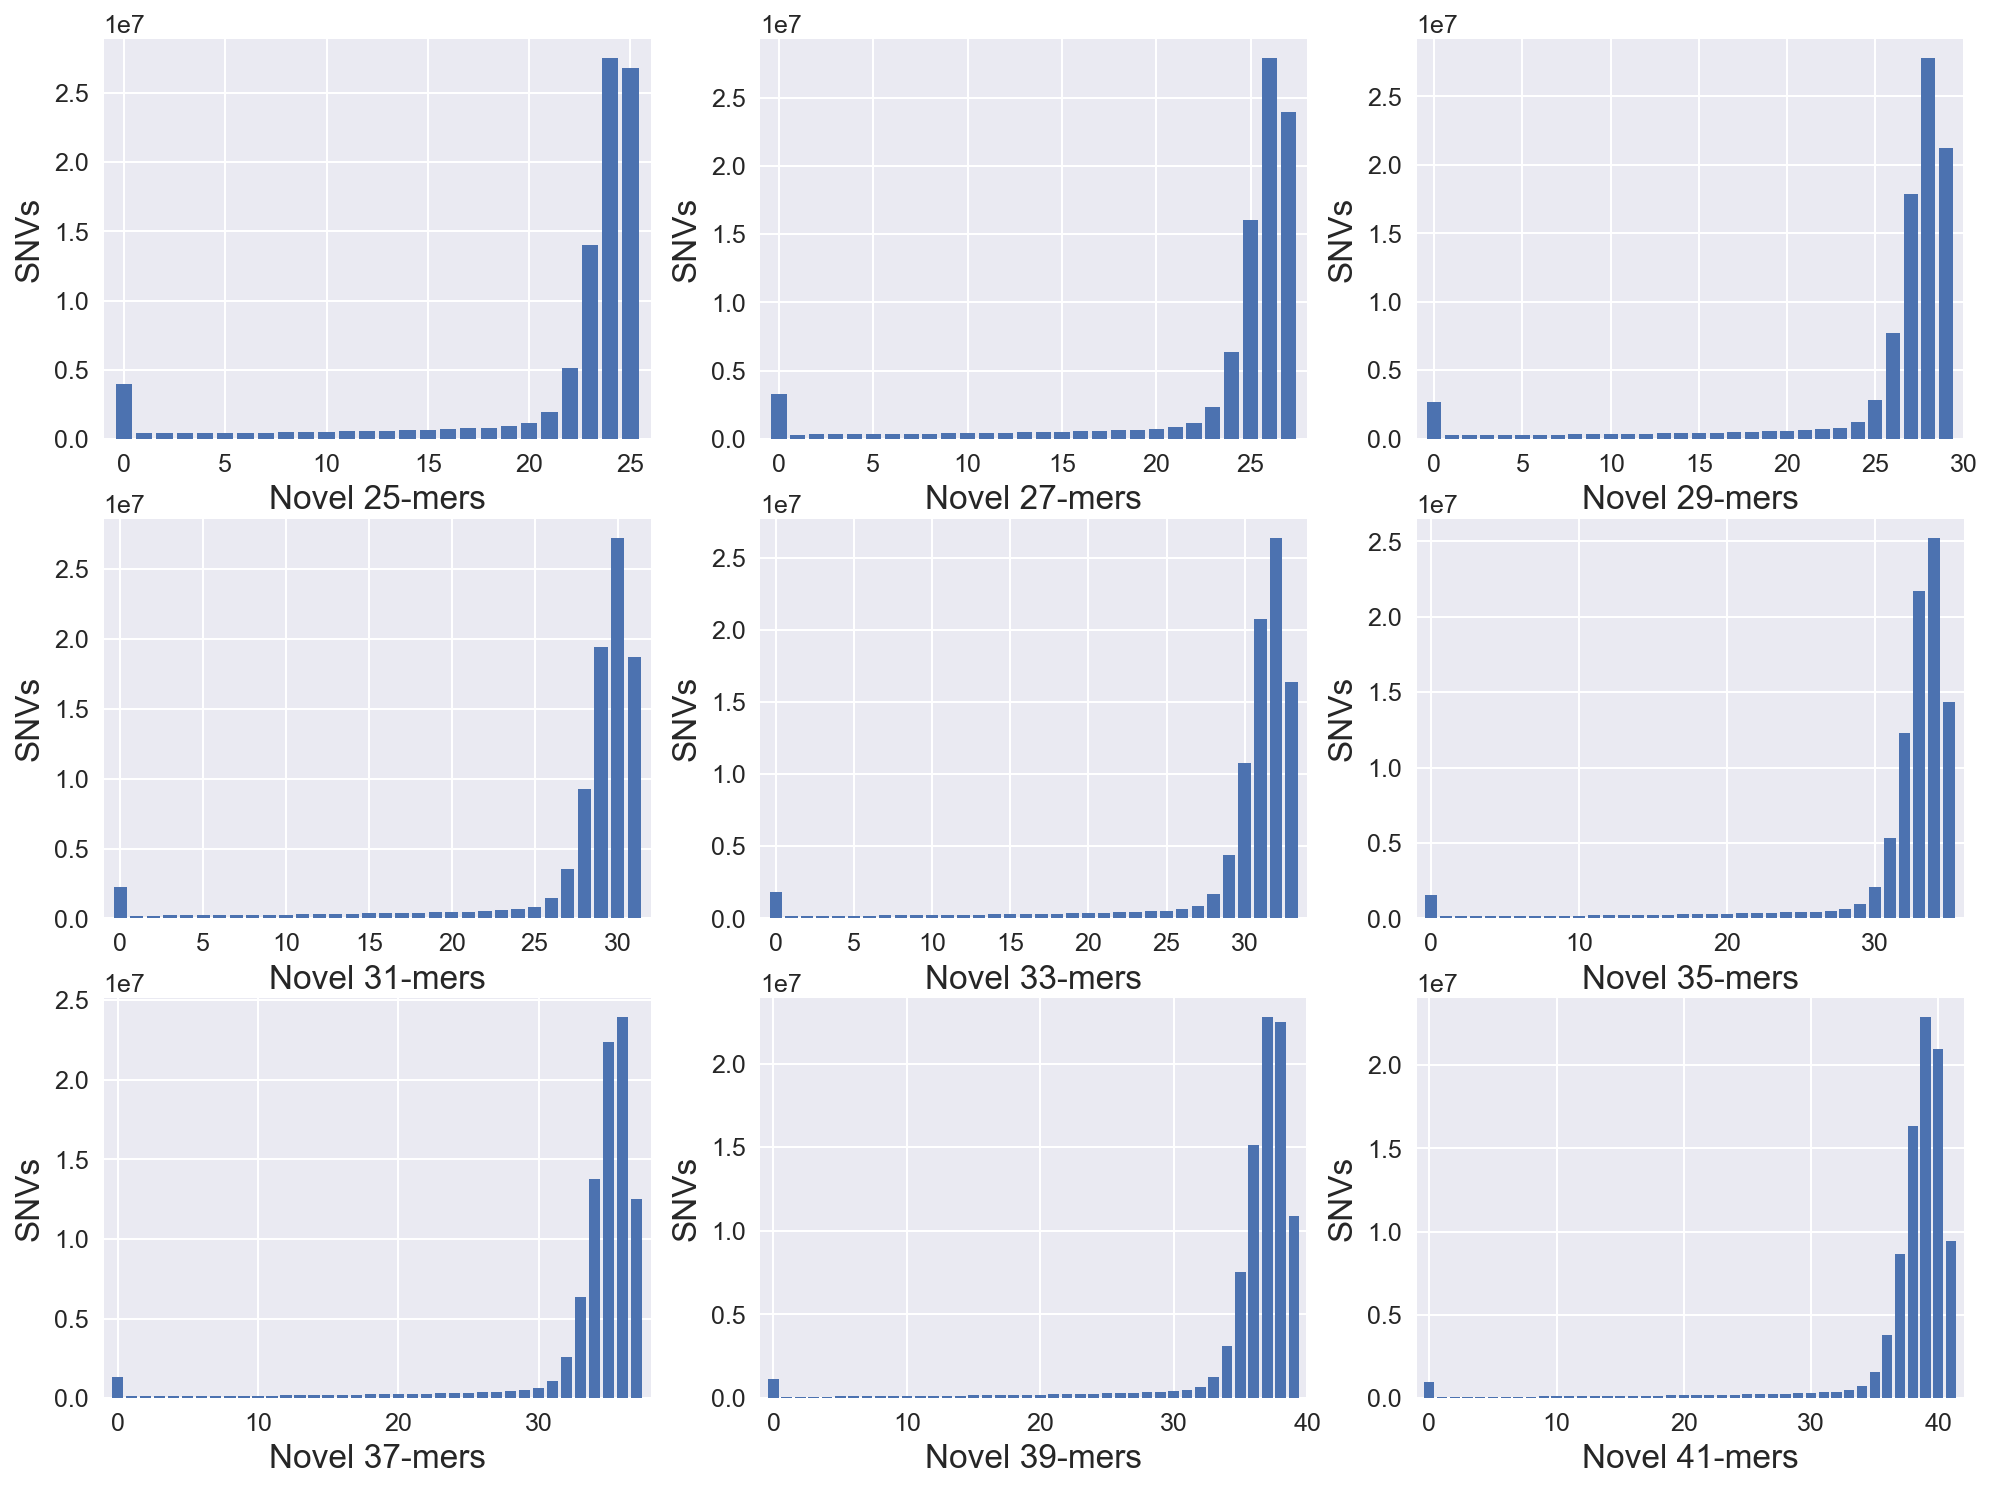

In [5]:
figure, axes = plt.subplots(3, 3, sharey=False)
axes = axes.ravel()

seaborn.set_context({"figure.figsize": (20, 16)})
for i, k in enumerate(kvalues):
    x = list(range(k + 1))

    _ = axes[i].bar(x, unique_hists[k]['snv'])
    _ = axes[i].set_xlim(-1, k + 1)
    _ = axes[i].set_xlabel('Novel {}-mers'.format(k))
    _ = axes[i].set_ylabel('SNVs')

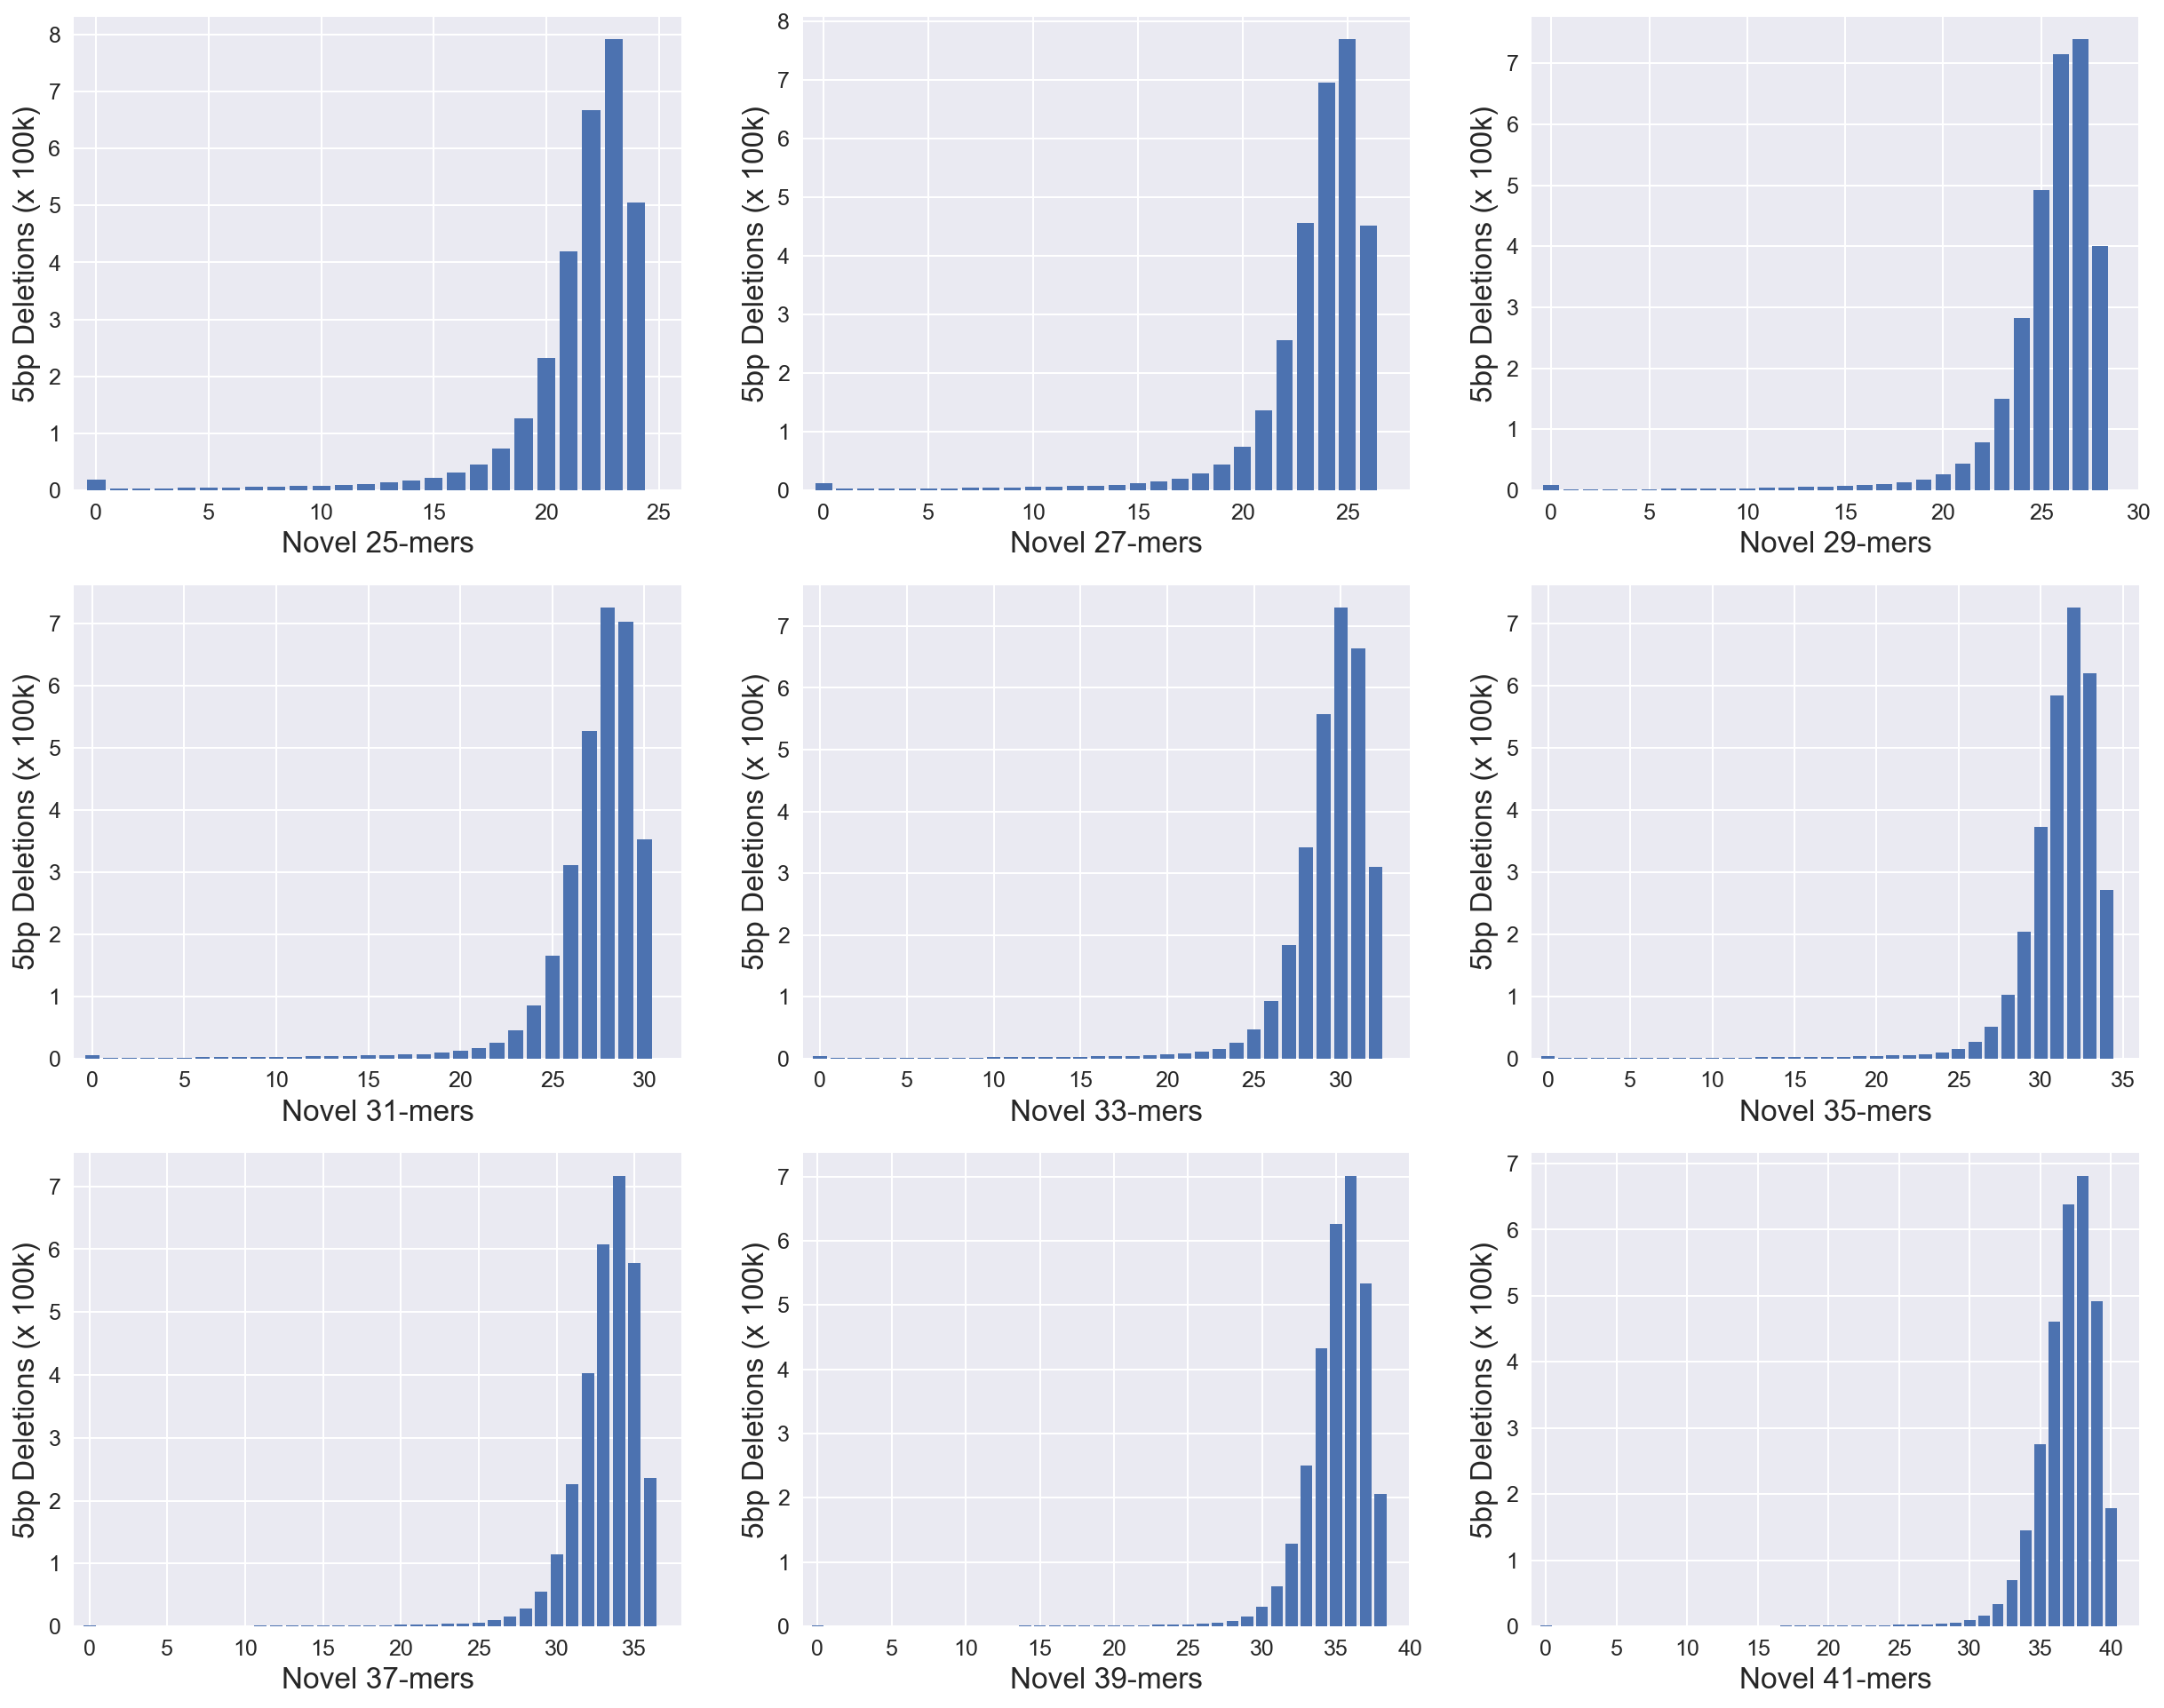

In [6]:
figure, axes = plt.subplots(3, 3, sharey=False)
axes = axes.ravel()

seaborn.set_context({"figure.figsize": (20, 16)})
for i, k in enumerate(kvalues):
    x = list(range(k + 1))

    _ = axes[i].bar(x, [y / 1e6 for y in unique_hists[k]['del']])
    _ = axes[i].set_xlim(-1, k + 1)
    _ = axes[i].set_xlabel('Novel {}-mers'.format(k))
    _ = axes[i].set_ylabel('5bp Deletions (x 100k)')